In [2]:
from typing import Any, List, Literal, Union
from pyannote.core import Annotation, Timeline
from pyannote.database import ProtocolFile, registry

def get_ann_preprocessor(action: Literal['vad', 'overlap']):
    def annotation_preprocessor(current_file: ProtocolFile) -> Annotation:
        annotation: Annotation = current_file["annotation"]

        if action == "vad":
            target_timeline: Timeline = annotation.get_timeline().support()
        elif action == "overlap":
            target_timeline: Timeline = annotation.get_overlap()

        result: Annotation = annotation.empty()
        for segment in target_timeline.support_iter():
            result[segment, 0] = action
        return result
    return annotation_preprocessor

In [3]:
registry.load_database("../_data/sample/sample.yaml")
protocol_pure = registry.get_protocol("Sample.SpeakerDiarization.Debug")
protocol_vad = registry.get_protocol("Sample.SpeakerDiarization.Debug", preprocessors={"annotation": get_ann_preprocessor('vad')})
protocol_ov = registry.get_protocol("Sample.SpeakerDiarization.Debug", preprocessors={"annotation": get_ann_preprocessor('overlap')})

In [4]:
f_pure = next(protocol_pure.train())
f_vad = next(protocol_vad.train())
f_ov = next(protocol_ov.train())

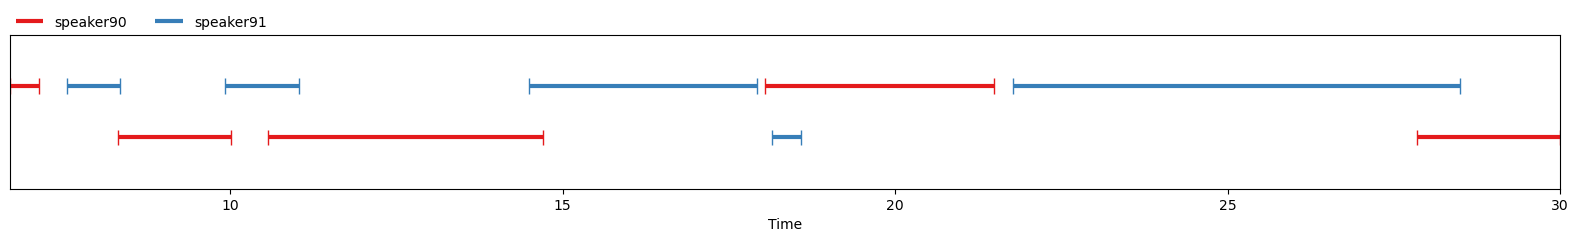

In [8]:
f_pure["annotation"]

/home/aplaquet/dev/main/pyannote-database/pyannote/database/protocol/protocol.py:140: UserWarning: Existing precomputed key "annotation" has been modified by a preprocessor.
  warnings.warn(msg.format(key=key))


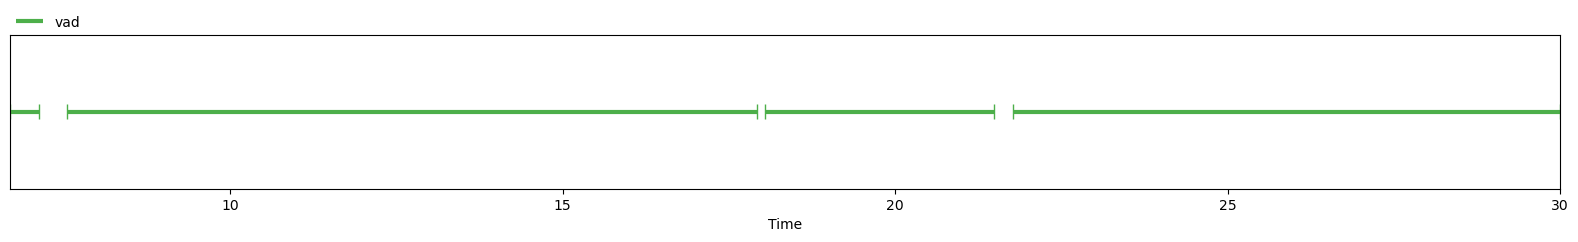

In [6]:
f_vad["annotation"]

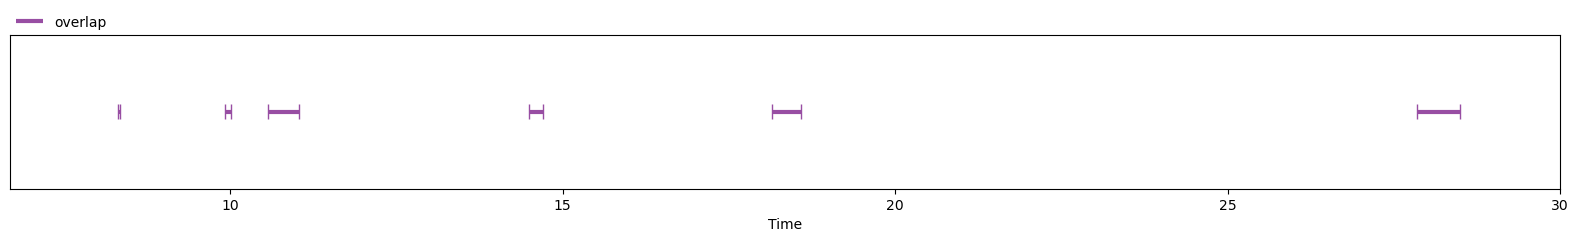

In [7]:
f_ov["annotation"]